In [1215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import utils
from sklearn import feature_selection
from sklearn import tree
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import ensemble
from IPython.display import display

In [943]:
x_data = pd.read_csv("d:/rishu/projectdata_machinelearning/Interview1.csv")
pd.options.display.max_columns=25

In [944]:
x_data.head(10)

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married
5,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
6,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
7,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,Gurgaon,Gurgaon,Noida,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
8,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
9,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 10,Female,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single


# Data Cleaning

In [945]:
x_data.info() # FOR GETTING THE FEATURES WITH NAN VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 23 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1233 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

In [946]:
# TOTAL CONTINUOUS COLUMNS = 0
# TOTAL CATEGORICAL COLUMNS = 23 (Including dependent variable)

In [947]:
x_data["Location"].value_counts()

Chennai       754
Bangalore     292
chennai        86
Hyderabad      38
Gurgaon        33
Noida          15
- Cochin-       9
chennai         3
Gurgaonr        1
Delhi           1
CHENNAI         1
Name: Location, dtype: int64

In [948]:
x_data["Location"].replace({'chennai':'Chennai','CHENNAI':'Chennai','Gurgaonr':'Gurgaon','chennai ':'Chennai','- Cochin- ':'Cochin'},inplace=True)

In [949]:
x_data["Location"] = x_data["Location"].str.upper()

In [950]:
x_data["Location"].value_counts()

CHENNAI      844
BANGALORE    292
HYDERABAD     38
GURGAON       34
NOIDA         15
COCHIN         9
DELHI          1
Name: Location, dtype: int64

In [951]:
x_data["Industry"].value_counts()

BFSI                        949
Pharmaceuticals             165
IT Products and Services     45
Electronics                  23
IT Services                  23
Telecom                      17
IT                           11
Name: Industry, dtype: int64

In [952]:
x_data["Industry"] = x_data["Industry"].str.upper()

In [953]:
x_data["Industry"].value_counts()

BFSI                        949
PHARMACEUTICALS             165
IT PRODUCTS AND SERVICES     45
ELECTRONICS                  23
IT SERVICES                  23
TELECOM                      17
IT                           11
Name: Industry, dtype: int64

In [954]:
x_data["Position to be closed"].value_counts()

Routine                1023
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Production- Sterile       5
Selenium testing          5
Name: Position to be closed, dtype: int64

In [955]:
x_data["Position to be closed"] = x_data["Position to be closed"].str.upper()

In [956]:
x_data["Position to be closed"].value_counts()

ROUTINE                1023
NICHE                   163
DOT NET                  18
TRADE FINANCE            11
AML                       8
SELENIUM TESTING          5
PRODUCTION- STERILE       5
Name: Position to be closed, dtype: int64

In [957]:
x_data["Nature of Skillset"].value_counts()

JAVA/J2EE/Struts/Hibernate                220
Fresher                                    86
Accounting Operations                      86
AML/KYC/CDD                                84
CDD KYC                                    52
Routine                                    47
Oracle                                     43
JAVA/SPRING/HIBERNATE/JSF                  42
Java J2EE                                  33
SAS                                        27
Java Developer                             25
Oracle Plsql                               25
Lending and Liabilities                    22
Banking Operations                         22
Java                                       21
Core Java                                  17
Java J2ee                                  16
T-24 developer                             15
ALS Testing                                15
Senior software engineer-Mednet            15
SCCM                                       14
Sr Automation Testing             

In [958]:
x_data["Nature of Skillset"] = x_data["Nature of Skillset"].str.upper()

In [959]:
x_data["Nature of Skillset"]=x_data["Nature of Skillset"].str.upper()
x_data["Nature of Skillset"]=x_data["Nature of Skillset"].replace({"11.30 AM":np.nan ,"10.00 AM":np.nan ,"9.00 AM":np.nan ,"12.30 PM":np.nan ,"9.30 AM":np.nan})
x_data["Nature of Skillset"].fillna("NA",inplace=True)

In [960]:
x_data["Nature of Skillset"].replace({'LENDING & LIABILITY':'LENDING AND LIABILITIES' , 'L & L':'LENDING AND LIABILITIES' ,
       'LENDING&LIABLITIES':'LENDING AND LIABILITIES','JAVA ':'JAVA','JAVA,SPRING,HIBERNATE':'JAVA, SPRING, HIBERNATE','ANALYTICAL R & D':'ANALYTICAL R&D', 'BIOSIMILIARS':'BIOSIMILARS','BIOSIMILLAR':'BIOSIMILARS','JAVA ,J2EE':'JAVA,J2EE', 'JAVA, J2EE':'JAVA,J2EE',
       'JAVA/J2EE':'JAVA,J2EE','JAVA J2EE':'JAVA,J2EE','TL':'TECHNICAL LEAD','TECH LEAD- MEDNET':'TECH LEAD-MEDNET','JAVA, SQL':'JAVA,SQL' },inplace=True)

In [961]:
x_data["Nature of Skillset"].value_counts()

JAVA/J2EE/STRUTS/HIBERNATE                220
ACCOUNTING OPERATIONS                      86
FRESHER                                    86
AML/KYC/CDD                                84
JAVA,J2EE                                  71
CDD KYC                                    52
ROUTINE                                    47
ORACLE                                     43
JAVA/SPRING/HIBERNATE/JSF                  42
LENDING AND LIABILITIES                    33
JAVA                                       31
SAS                                        27
ORACLE PLSQL                               25
JAVA DEVELOPER                             25
BANKING OPERATIONS                         24
CORE JAVA                                  17
ANALYTICAL R&D                             16
SCCM                                       15
ALS TESTING                                15
SENIOR SOFTWARE ENGINEER-MEDNET            15
T-24 DEVELOPER                             15
COTS DEVELOPER                    

In [962]:
x_data["Interview Type"].value_counts()

Scheduled Walk In    456
Scheduled            371
Scheduled Walkin     189
Walkin               189
Walkin                27
Sceduled walkin        1
Name: Interview Type, dtype: int64

In [963]:
x_data["Interview Type"] = x_data["Interview Type"].str.upper()

In [964]:
x_data["Interview Type"].replace({"SCHEDULED WALKIN":"SCHEDULED WALK IN","WALKIN ":"WALKIN","SCEDULED WALKIN":"SCHEDULED WALK IN"}, inplace=True)

In [965]:
x_data["Interview Type"].value_counts()

SCHEDULED WALK IN    646
SCHEDULED            371
WALKIN               216
Name: Interview Type, dtype: int64

In [966]:
x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].value_counts()

Yes                          936
No                            27
Na                            19
No I have only thi number      2
yes                            1
na                             1
Name: Can I have an alternative number/ desk number. I assure you that I will not trouble you too much, dtype: int64

In [967]:
x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].fillna("NA", inplace=True)

In [968]:
x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"] = x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].str.upper()

In [969]:
x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"] = x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].replace({"NO I HAVE ONLY THI NUMBER":"NO"})

In [970]:
x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].value_counts()

YES    937
NA     267
NO      29
Name: Can I have an alternative number/ desk number. I assure you that I will not trouble you too much, dtype: int64

In [971]:
x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].value_counts()

Yes                      940
Na                        19
No                        16
Not Yet                    4
yes                        2
Not yet                    2
na                         1
No- will take it soon      1
Name: Have you taken a printout of your updated resume. Have you read the JD and understood the same, dtype: int64

In [972]:
x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].fillna("NA", inplace=True)

In [973]:
x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"] = x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].str.upper()

In [974]:
x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"] = x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].replace({"NOT YET":"NO","NO- WILL TAKE IT SOON":"NO",})

In [975]:
x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].value_counts()

YES    942
NA     268
NO      23
Name: Have you taken a printout of your updated resume. Have you read the JD and understood the same, dtype: int64

In [976]:
x_data["Are you clear with the venue details and the landmark."].value_counts()

Yes                    946
Na                      19
No                      14
yes                      2
No- I need to check      2
no                       1
na                       1
Name: Are you clear with the venue details and the landmark., dtype: int64

In [977]:
x_data["Are you clear with the venue details and the landmark."].fillna("NA",inplace=True)

In [978]:
x_data["Are you clear with the venue details and the landmark."] = x_data["Are you clear with the venue details and the landmark."].str.upper()

In [979]:
x_data["Are you clear with the venue details and the landmark."] = x_data["Are you clear with the venue details and the landmark."].replace({"NO- I NEED TO CHECK":"NO"})

In [980]:
x_data["Are you clear with the venue details and the landmark."].value_counts()

YES    948
NA     268
NO      17
Name: Are you clear with the venue details and the landmark., dtype: int64

In [981]:
x_data["Has the call letter been shared"].value_counts()

Yes               932
Na                 19
No                 17
Not Sure            8
Need To Check       3
yes                 2
Not yet             2
Havent Checked      1
Yet to Check        1
Not sure            1
no                  1
na                  1
Name: Has the call letter been shared, dtype: int64

In [982]:
x_data["Has the call letter been shared"].fillna("NA", inplace=True)

In [983]:
x_data["Has the call letter been shared"] = x_data["Has the call letter been shared"].str.upper()

In [984]:
x_data["Has the call letter been shared"].replace({"NOT YET":"NO","NOT SURE":"UNCERTAIN","YET TO CHECK":"UNCERTAIN","NEED TO CHECK":"UNCERTAIN","HAVENT CHECKED":"UNCERTAIN"}, inplace=True)

In [985]:
x_data["Has the call letter been shared"].value_counts()

YES          934
NA           265
NO            20
UNCERTAIN     14
Name: Has the call letter been shared, dtype: int64

In [986]:
x_data["Expected Attendance"].value_counts()

Yes          882
Uncertain    250
No            59
NO            34
yes            1
10.30 Am       1
11:00 AM       1
Name: Expected Attendance, dtype: int64

In [987]:
x_data["Expected Attendance"].fillna("NA", inplace=True)

In [988]:
x_data["Expected Attendance"] = x_data["Expected Attendance"].str.upper()

In [989]:
x_data["Expected Attendance"].replace({"10.30 AM":"YES","11:00 AM":"YES","NA":"UNCERTAIN"}, inplace=True)

In [990]:
x_data["Expected Attendance"].value_counts()

YES          885
UNCERTAIN    255
NO            93
Name: Expected Attendance, dtype: int64

In [991]:
x_data["Marital Status"] = x_data["Marital Status"].str.upper()

In [992]:
x_data["Marital Status"].value_counts()

SINGLE     767
MARRIED    466
Name: Marital Status, dtype: int64

In [993]:
x_data["Gender"] = x_data["Gender"].str.upper()

In [994]:
x_data["Gender"].value_counts()

MALE      965
FEMALE    268
Name: Gender, dtype: int64

In [995]:
x_data["Candidate Current Location"].value_counts()

Chennai       754
Bangalore     292
chennai        86
Hyderabad      38
Gurgaon        34
Noida          15
- Cochin-       9
chennai         3
Delhi           1
CHENNAI         1
Name: Candidate Current Location, dtype: int64

In [996]:
x_data["Candidate Current Location"].fillna("NA", inplace=True)

In [997]:
x_data["Candidate Current Location"]=x_data["Candidate Current Location"].str.upper()

In [998]:
x_data["Candidate Current Location"].replace({'CHENNAI ':'CHENNAI','- COCHIN- ':'COCHIN'},inplace=True)

In [999]:
x_data["Candidate Current Location"].value_counts()

CHENNAI      844
BANGALORE    292
HYDERABAD     38
GURGAON       34
NOIDA         15
COCHIN         9
DELHI          1
Name: Candidate Current Location, dtype: int64

In [1000]:
x_data["Candidate Job Location"].value_counts()

Chennai          893
Bangalore        259
Gurgaon           35
Visakapatinam     21
Noida             15
- Cochin-          9
Hosur              1
Name: Candidate Job Location, dtype: int64

In [1001]:
x_data["Candidate Job Location"].fillna("NA", inplace=True)

In [1002]:
x_data["Candidate Job Location"].replace({'- Cochin- ':'Cochin'},inplace=True)

In [1003]:
x_data["Candidate Job Location"] = x_data["Candidate Job Location"].str.upper()

In [1004]:
x_data["Candidate Job Location"].value_counts()

CHENNAI          893
BANGALORE        259
GURGAON           35
VISAKAPATINAM     21
NOIDA             15
COCHIN             9
HOSUR              1
Name: Candidate Job Location, dtype: int64

In [1005]:
x_data["Interview Venue"].value_counts()

Chennai       852
Bangalore     277
Hyderabad      40
Gurgaon        35
Noida          15
- Cochin-       9
Hosur           5
Name: Interview Venue, dtype: int64

In [1006]:
x_data["Interview Venue"].replace({'- Cochin- ':'Cochin'},inplace=True)

In [1007]:
x_data["Interview Venue"].fillna("NA", inplace=True)

In [1008]:
x_data["Interview Venue"] = x_data["Interview Venue"].str.upper()

In [1009]:
x_data["Interview Venue"].value_counts()

CHENNAI      852
BANGALORE    277
HYDERABAD     40
GURGAON       35
NOIDA         15
COCHIN         9
HOSUR          5
Name: Interview Venue, dtype: int64

In [1010]:
x_data["Candidate Native location"].value_counts()

Chennai          595
Hyderabad        172
Bangalore        151
Gurgaon           26
Cuttack           25
Cochin            24
Pune              22
Coimbatore        21
Allahabad         20
Noida             17
Visakapatinam     16
Nagercoil         16
Kolkata           14
Trivandrum        14
Trichy            13
Vellore           12
Mumbai             7
Chitoor            6
Chandigarh         5
- Cochin-          5
Pondicherry        5
Ahmedabad          5
Tirupati           4
Delhi              4
Vijayawada         4
Salem              3
Warangal           3
Hosur              3
Patna              2
Ambur              2
Delhi /NCR         2
Mysore             1
Baddi              1
Faizabad           1
Panjim             1
Lucknow            1
Tuticorin          1
Bhubaneshwar       1
Ghaziabad          1
Tanjore            1
Hissar             1
Agra               1
Anantapur          1
Kanpur             1
Belgaum            1
Kurnool            1
Name: Candidate Native location, d

In [1011]:
x_data["Candidate Native location"].replace({'- Cochin- ':'Cochin'},inplace=True)

In [1012]:
x_data["Candidate Native location"].fillna("NA", inplace=True)

In [1013]:
x_data["Candidate Native location"] = x_data["Candidate Native location"].str.upper()

In [1014]:
x_data["Candidate Native location"].value_counts()

CHENNAI          595
HYDERABAD        172
BANGALORE        151
COCHIN            29
GURGAON           26
CUTTACK           25
PUNE              22
COIMBATORE        21
ALLAHABAD         20
NOIDA             17
NAGERCOIL         16
VISAKAPATINAM     16
TRIVANDRUM        14
KOLKATA           14
TRICHY            13
VELLORE           12
MUMBAI             7
CHITOOR            6
PONDICHERRY        5
AHMEDABAD          5
CHANDIGARH         5
VIJAYAWADA         4
TIRUPATI           4
DELHI              4
SALEM              3
WARANGAL           3
HOSUR              3
PATNA              2
AMBUR              2
DELHI /NCR         2
FAIZABAD           1
BELGAUM            1
AGRA               1
BADDI              1
PANJIM             1
KURNOOL            1
TANJORE            1
GHAZIABAD          1
MYSORE             1
KANPUR             1
TUTICORIN          1
LUCKNOW            1
ANANTAPUR          1
BHUBANESHWAR       1
HISSAR             1
Name: Candidate Native location, dtype: int64

In [1015]:
x_data["Have you obtained the necessary permission to start at the required time"].value_counts()

Yes               917
No                 79
Not yet            19
Na                  5
yes                 4
Yet to confirm      4
NO                  1
Name: Have you obtained the necessary permission to start at the required time, dtype: int64

In [1016]:
x_data["Have you obtained the necessary permission to start at the required time"].replace({'Not yet':'No', 'Yet to confirm':"UNCERTAIN", 'NO':'No', 'yes':'Yes'},inplace=True)

In [1017]:
x_data["Have you obtained the necessary permission to start at the required time"].fillna("NA", inplace=True)

In [1018]:
x_data["Have you obtained the necessary permission to start at the required time"] = x_data["Have you obtained the necessary permission to start at the required time"].str.upper()

In [1019]:
x_data["Have you obtained the necessary permission to start at the required time"].value_counts()

YES          921
NA           209
NO            99
UNCERTAIN      4
Name: Have you obtained the necessary permission to start at the required time, dtype: int64

In [1020]:
x_data["Hope there will be no unscheduled meetings"].value_counts()

Yes         949
Na           20
No            6
yes           5
Not sure      4
cant Say      1
Not Sure      1
Name: Hope there will be no unscheduled meetings, dtype: int64

In [1021]:
x_data["Hope there will be no unscheduled meetings"].fillna("NA", inplace=True)

In [1022]:
x_data["Hope there will be no unscheduled meetings"].replace({'yes':'Yes', 'Not Sure':"UNCERTAIN", 'cant Say':'UNCERTAIN',"NOT SURE":"UNCERTAIN"},inplace=True)

In [1023]:
x_data["Hope there will be no unscheduled meetings"] = x_data["Hope there will be no unscheduled meetings"].str.upper()

In [1024]:
x_data["Hope there will be no unscheduled meetings"].value_counts()

YES          954
NA           267
NO             6
NOT SURE       4
UNCERTAIN      2
Name: Hope there will be no unscheduled meetings, dtype: int64

In [1025]:
x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"].value_counts()

Yes        951
Na          20
No          10
yes          4
No Dont      1
Name: Can I Call you three hours before the interview and follow up on your attendance for the interview, dtype: int64

In [1026]:
x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"].fillna("NA", inplace=True)

In [1027]:
x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"].replace({"No Dont":"NO"},inplace=True)

In [1028]:
x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"] = x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"].str.upper()

In [1029]:
x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"].value_counts()

YES    955
NA     267
NO      11
Name: Can I Call you three hours before the interview and follow up on your attendance for the interview, dtype: int64

In [1030]:
x_data["Observed Attendance"].value_counts()

Yes     701
No      401
yes      81
NO       35
no        7
No        6
no        1
yes       1
Name: Observed Attendance, dtype: int64

In [1031]:
x_data["Observed Attendance"] = x_data["Observed Attendance"].str.upper()

In [1032]:
x_data["Observed Attendance"].replace({"YES ":"YES","NO ": "NO"}, inplace=True)

In [1033]:
x_data["Observed Attendance"].value_counts()

YES    783
NO     450
Name: Observed Attendance, dtype: int64

In [1034]:
x_data.head(10) # CLEANED DATASET

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,PHARMACEUTICALS,CHENNAI,PRODUCTION- STERILE,ROUTINE,SCHEDULED WALK IN,Candidate 1,MALE,CHENNAI,HOSUR,HOSUR,HOSUR,YES,YES,YES,YES,YES,YES,YES,YES,NO,SINGLE
1,13.02.2015,Hospira,PHARMACEUTICALS,CHENNAI,PRODUCTION- STERILE,ROUTINE,SCHEDULED WALK IN,Candidate 2,MALE,CHENNAI,BANGALORE,HOSUR,TRICHY,YES,YES,YES,YES,YES,YES,YES,YES,NO,SINGLE
2,13.02.2015,Hospira,PHARMACEUTICALS,CHENNAI,PRODUCTION- STERILE,ROUTINE,SCHEDULED WALK IN,Candidate 3,MALE,CHENNAI,CHENNAI,HOSUR,CHENNAI,NA,NA,NA,NA,NA,NA,NA,UNCERTAIN,NO,SINGLE
3,13.02.2015,Hospira,PHARMACEUTICALS,CHENNAI,PRODUCTION- STERILE,ROUTINE,SCHEDULED WALK IN,Candidate 4,MALE,CHENNAI,CHENNAI,HOSUR,CHENNAI,YES,YES,NO,YES,NO,YES,YES,UNCERTAIN,NO,SINGLE
4,13.02.2015,Hospira,PHARMACEUTICALS,CHENNAI,PRODUCTION- STERILE,ROUTINE,SCHEDULED WALK IN,Candidate 5,MALE,CHENNAI,BANGALORE,HOSUR,CHENNAI,YES,YES,YES,NO,YES,YES,YES,UNCERTAIN,NO,MARRIED
5,13.02.2015,Aon Hewitt,IT SERVICES,GURGAON,SELENIUM TESTING,ROUTINE,SCHEDULED WALK IN,Candidate 6,MALE,GURGAON,GURGAON,GURGAON,GURGAON,YES,YES,YES,YES,YES,YES,YES,YES,YES,SINGLE
6,13.02.2015,Aon Hewitt,IT SERVICES,GURGAON,SELENIUM TESTING,ROUTINE,SCHEDULED WALK IN,Candidate 7,MALE,GURGAON,GURGAON,GURGAON,GURGAON,YES,YES,YES,YES,YES,YES,YES,YES,YES,SINGLE
7,13.02.2015,Aon Hewitt,IT SERVICES,GURGAON,SELENIUM TESTING,ROUTINE,SCHEDULED WALK IN,Candidate 8,FEMALE,GURGAON,GURGAON,GURGAON,NOIDA,YES,YES,YES,YES,YES,YES,YES,YES,YES,SINGLE
8,13.02.2015,Aon Hewitt,IT SERVICES,GURGAON,SELENIUM TESTING,ROUTINE,SCHEDULED WALK IN,Candidate 9,MALE,GURGAON,GURGAON,GURGAON,DELHI /NCR,YES,YES,YES,YES,YES,YES,YES,YES,YES,SINGLE
9,13.02.2015,Aon Hewitt,IT SERVICES,GURGAON,SELENIUM TESTING,ROUTINE,SCHEDULED WALK IN,Candidate 10,FEMALE,GURGAON,GURGAON,GURGAON,DELHI /NCR,YES,YES,YES,YES,YES,YES,YES,YES,NO,SINGLE


In [1035]:
for cols in x_data.columns:
    print(x_data[cols].isnull().sum(), end=" ")    # WE HAVE REMOVED ALL THE NULL VALUES

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Countplots

[Text(0, 0, 'PHARMACEUTICALS'),
 Text(0, 0, 'IT SERVICES'),
 Text(0, 0, 'BFSI'),
 Text(0, 0, 'IT PRODUCTS AND SERVICES'),
 Text(0, 0, 'ELECTRONICS'),
 Text(0, 0, 'TELECOM'),
 Text(0, 0, 'IT')]

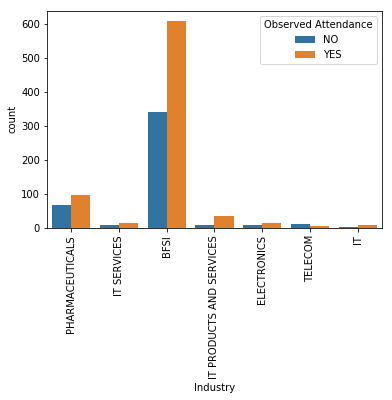

In [1036]:
inl = sns.countplot(x="Industry", hue="Observed Attendance", data=x_data)
inl.set_xticklabels(labels = x_data["Industry"].unique(), rotation=90)

[Text(0, 0, 'CHENNAI'),
 Text(0, 0, 'GURGAON'),
 Text(0, 0, 'BANGALORE'),
 Text(0, 0, 'HYDERABAD'),
 Text(0, 0, 'DELHI'),
 Text(0, 0, 'COCHIN'),
 Text(0, 0, 'NOIDA')]

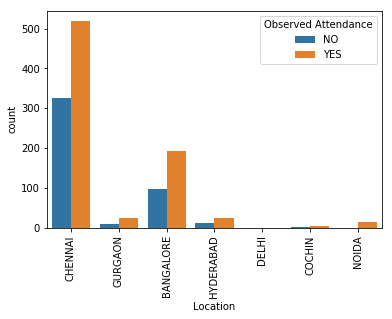

In [1037]:
l = sns.countplot(x="Location", hue="Observed Attendance", data=x_data)
l.set_xticklabels(labels = x_data["Location"].unique(), rotation=90)

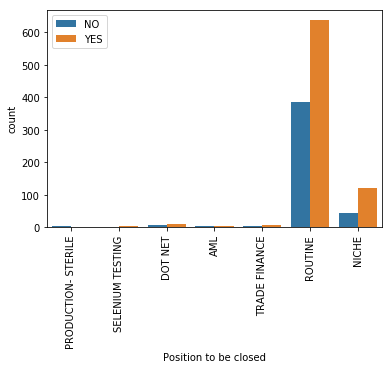

In [1038]:
po = sns.countplot(x="Position to be closed", hue="Observed Attendance", data=x_data)
po.set_xticklabels(labels=x_data["Position to be closed"].unique(), rotation=90)
plt.legend(loc="upper left")

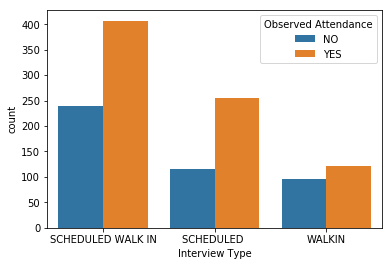

In [1039]:
sns.countplot(x="Interview Type", hue="Observed Attendance", data=x_data)

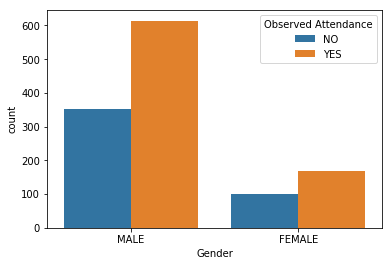

In [1040]:
sns.countplot(x="Gender", hue="Observed Attendance", data=x_data)

[Text(0, 0, 'CHENNAI'),
 Text(0, 0, 'GURGAON'),
 Text(0, 0, 'BANGALORE'),
 Text(0, 0, 'HYDERABAD'),
 Text(0, 0, 'DELHI'),
 Text(0, 0, 'COCHIN'),
 Text(0, 0, 'NOIDA')]

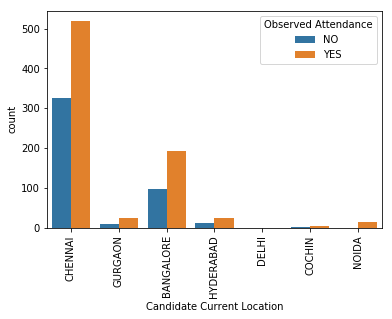

In [1041]:
cl = sns.countplot(x="Candidate Current Location", hue="Observed Attendance", data=x_data)  # Candidate current location and location are same columns
cl.set_xticklabels(labels = x_data["Candidate Current Location"].unique(), rotation=90)

[Text(0, 0, 'HOSUR'),
 Text(0, 0, 'BANGALORE'),
 Text(0, 0, 'CHENNAI'),
 Text(0, 0, 'GURGAON'),
 Text(0, 0, 'VISAKAPATINAM'),
 Text(0, 0, 'COCHIN'),
 Text(0, 0, 'NOIDA')]

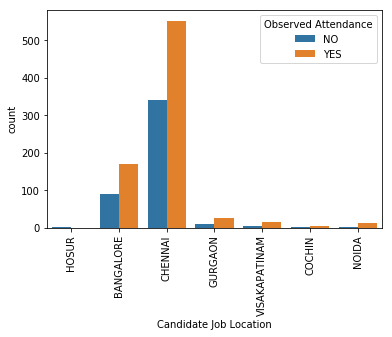

In [1042]:
jl = sns.countplot(x="Candidate Job Location", hue="Observed Attendance", data=x_data)
jl.set_xticklabels(labels=x_data["Candidate Job Location"].unique(), rotation=90)

[Text(0, 0, 'HOSUR'),
 Text(0, 0, 'GURGAON'),
 Text(0, 0, 'BANGALORE'),
 Text(0, 0, 'CHENNAI'),
 Text(0, 0, 'HYDERABAD'),
 Text(0, 0, 'COCHIN'),
 Text(0, 0, 'NOIDA')]

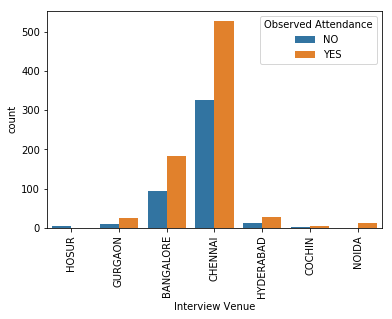

In [1043]:
iv = sns.countplot(x="Interview Venue", hue="Observed Attendance", data=x_data)
iv.set_xticklabels(labels=x_data["Interview Venue"].unique(), rotation=90)

[Text(0, 0, 'HOSUR'),
 Text(0, 0, 'TRICHY'),
 Text(0, 0, 'CHENNAI'),
 Text(0, 0, 'GURGAON'),
 Text(0, 0, 'NOIDA'),
 Text(0, 0, 'DELHI /NCR'),
 Text(0, 0, 'COCHIN'),
 Text(0, 0, 'TRIVANDRUM'),
 Text(0, 0, 'BANGALORE'),
 Text(0, 0, 'COIMBATORE'),
 Text(0, 0, 'SALEM'),
 Text(0, 0, 'TANJORE'),
 Text(0, 0, 'HYDERABAD'),
 Text(0, 0, 'MUMBAI'),
 Text(0, 0, 'PUNE'),
 Text(0, 0, 'KOLKATA'),
 Text(0, 0, 'ALLAHABAD'),
 Text(0, 0, 'PANJIM'),
 Text(0, 0, 'CUTTACK'),
 Text(0, 0, 'VISAKAPATINAM'),
 Text(0, 0, 'BELGAUM'),
 Text(0, 0, 'PATNA'),
 Text(0, 0, 'CHITOOR'),
 Text(0, 0, 'ANANTAPUR'),
 Text(0, 0, 'WARANGAL'),
 Text(0, 0, 'AHMEDABAD'),
 Text(0, 0, 'KURNOOL'),
 Text(0, 0, 'VIJAYAWADA'),
 Text(0, 0, 'VELLORE'),
 Text(0, 0, 'PONDICHERRY'),
 Text(0, 0, 'NAGERCOIL'),
 Text(0, 0, 'AGRA'),
 Text(0, 0, 'BHUBANESHWAR'),
 Text(0, 0, 'GHAZIABAD'),
 Text(0, 0, 'BADDI'),
 Text(0, 0, 'TUTICORIN'),
 Text(0, 0, 'TIRUPATI'),
 Text(0, 0, 'FAIZABAD'),
 Text(0, 0, 'AMBUR'),
 Text(0, 0, 'CHANDIGARH'),
 Text(0, 0, '

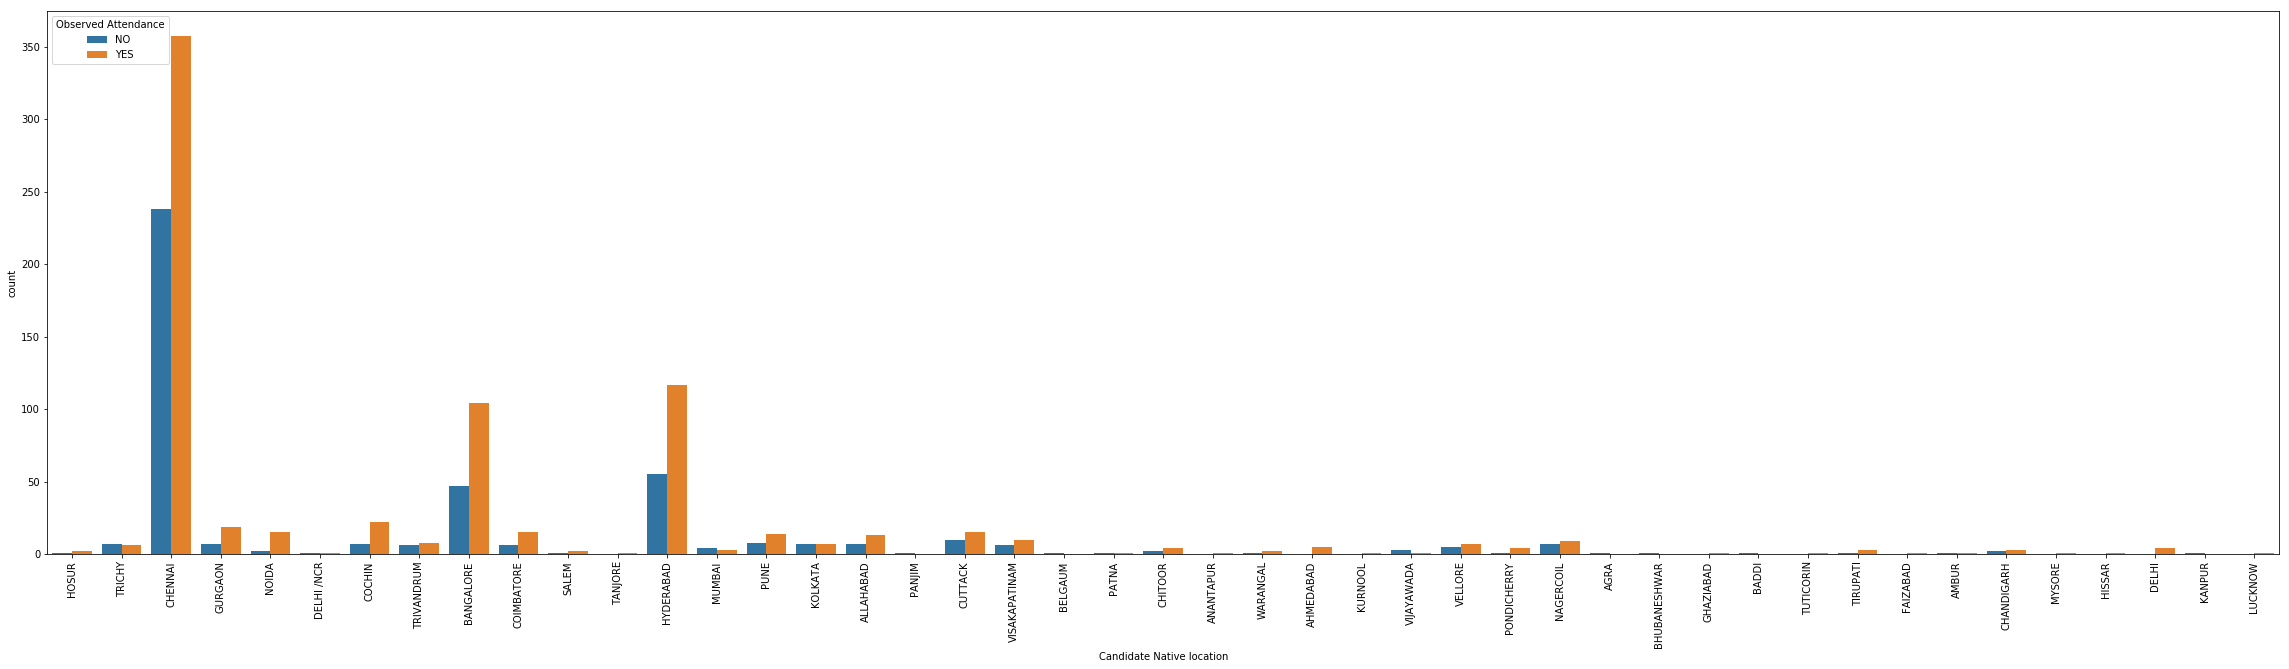

In [1044]:
plt.figure(figsize=(40,10))
nl = sns.countplot(x="Candidate Native location", hue="Observed Attendance", data=x_data)
nl.set_xticklabels(labels=x_data["Candidate Native location"].unique(), rotation=90)


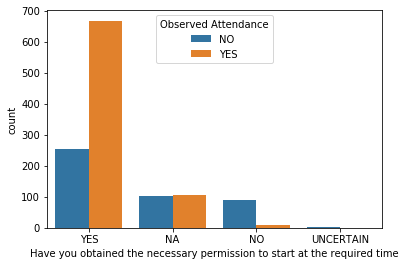

In [1045]:
sns.countplot(x="Have you obtained the necessary permission to start at the required time", hue="Observed Attendance", data=x_data)

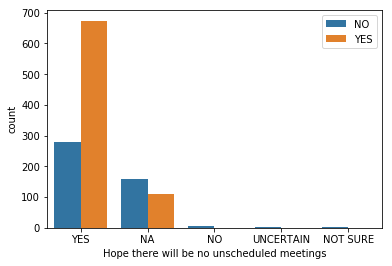

In [1046]:
sns.countplot(x="Hope there will be no unscheduled meetings", hue="Observed Attendance", data=x_data)
plt.legend(loc="upper right")

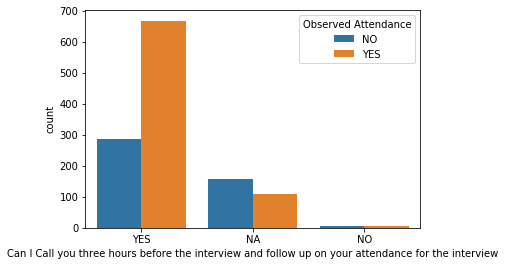

In [1047]:
sns.countplot(x="Can I Call you three hours before the interview and follow up on your attendance for the interview", hue="Observed Attendance", data=x_data)

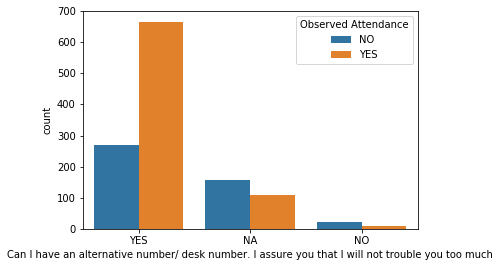

In [1048]:
sns.countplot(x="Can I have an alternative number/ desk number. I assure you that I will not trouble you too much", hue="Observed Attendance", data=x_data)

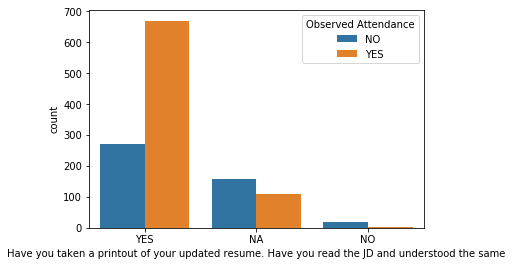

In [1049]:
sns.countplot(x="Have you taken a printout of your updated resume. Have you read the JD and understood the same", hue="Observed Attendance", data=x_data)

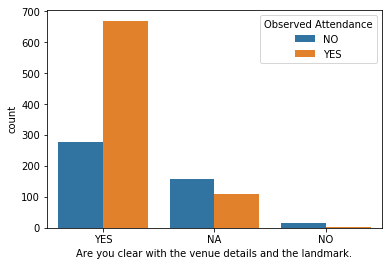

In [1050]:
sns.countplot(x="Are you clear with the venue details and the landmark.", hue="Observed Attendance", data=x_data)

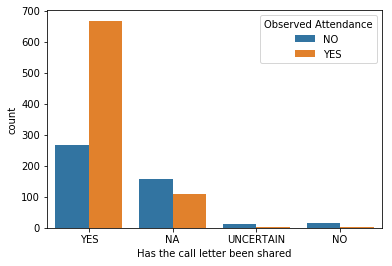

In [1051]:
has = sns.countplot(x="Has the call letter been shared", hue="Observed Attendance", data=x_data)


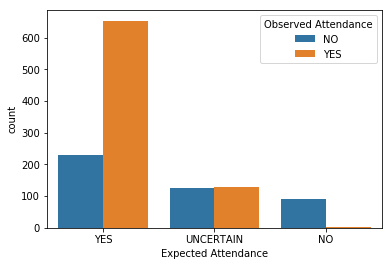

In [1052]:
sns.countplot(x="Expected Attendance", hue="Observed Attendance", data=x_data)

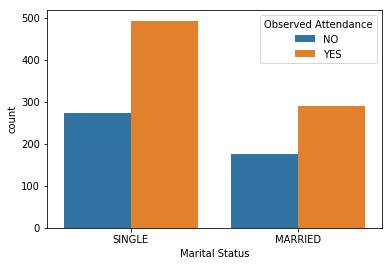

In [1053]:
sns.countplot(x="Marital Status", hue="Observed Attendance", data=x_data)

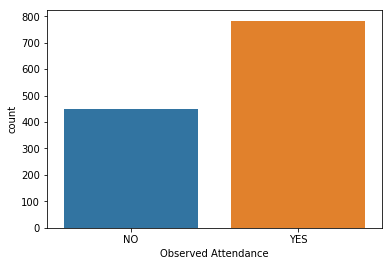

In [1054]:
sns.countplot(x="Observed Attendance", data=x_data) # RESULT

# Column-wise percentage for each type of category

In [1055]:
yes = []
no = []
for val in list(x_data["Candidate Current Location"].unique()):
    temp = x_data[x_data["Candidate Current Location"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Candidate Current Location"].unique()))

,YES,NO
CHENNAI,0.614929,0.385071
GURGAON,0.705882,0.294118
BANGALORE,0.660959,0.339041
HYDERABAD,0.684211,0.315789
DELHI,1.000000,0.000000
COCHIN,0.666667,0.333333
NOIDA,0.933333,0.066667


In [1056]:
yes = []
no = []
for val in list(x_data["Position to be closed"].unique()):
    temp = x_data[x_data["Position to be closed"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Position to be closed"].unique()))

,YES,NO
PRODUCTION- STERILE,0.000000,1.000000
SELENIUM TESTING,0.800000,0.200000
DOT NET,0.555556,0.444444
AML,0.625000,0.375000
TRADE FINANCE,0.636364,0.363636
ROUTINE,0.622678,0.377322
NICHE,0.736196,0.263804


In [1057]:
yes = []
no = []
for val in list(x_data["Interview Type"].unique()):
    temp = x_data[x_data["Interview Type"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Interview Type"].unique()))

,YES,NO
SCHEDULED WALK IN,0.630031,0.369969
SCHEDULED,0.687332,0.312668
WALKIN,0.560185,0.439815


In [1058]:
yes = []
no = []
for val in list(x_data["Gender"].unique()):
    temp = x_data[x_data["Gender"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Gender"].unique()))

,YES,NO
MALE,0.636269,0.363731
FEMALE,0.630597,0.369403


In [1059]:
yes = []
no = []
for val in list(x_data["Candidate Job Location"].unique()):
    temp = x_data[x_data["Candidate Job Location"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Candidate Job Location"].unique()))

,YES,NO
HOSUR,0.000000,1.000000
BANGALORE,0.656371,0.343629
CHENNAI,0.618141,0.381859
GURGAON,0.714286,0.285714
VISAKAPATINAM,0.761905,0.238095
COCHIN,0.666667,0.333333
NOIDA,0.933333,0.066667


In [1060]:
yes = []
no = []
for val in list(x_data["Interview Venue"].unique()):
    temp = x_data[x_data["Interview Venue"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Interview Venue"].unique()))

,YES,NO
HOSUR,0.000000,1.000000
GURGAON,0.714286,0.285714
BANGALORE,0.660650,0.339350
CHENNAI,0.618545,0.381455
HYDERABAD,0.700000,0.300000
COCHIN,0.666667,0.333333
NOIDA,0.933333,0.066667


In [1061]:
yes = []
no = []
for val in list(x_data["Candidate Native location"].unique()):
    temp = x_data[x_data["Candidate Native location"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Candidate Native location"].unique()))

,YES,NO
HOSUR,0.666667,0.333333
TRICHY,0.461538,0.538462
CHENNAI,0.600000,0.400000
GURGAON,0.730769,0.269231
NOIDA,0.882353,0.117647
DELHI /NCR,0.500000,0.500000
COCHIN,0.758621,0.241379
TRIVANDRUM,0.571429,0.428571
BANGALORE,0.688742,0.311258
COIMBATORE,0.714286,0.285714


In [1062]:
yes = []
no = []
for val in list(x_data["Have you obtained the necessary permission to start at the required time"].unique()):
    temp = x_data[x_data["Have you obtained the necessary permission to start at the required time"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Have you obtained the necessary permission to start at the required time"].unique()))

,YES,NO
YES,0.725299,0.274701
NA,0.507177,0.492823
NO,0.090909,0.909091
UNCERTAIN,0.000000,1.000000


In [1063]:
yes = []
no = []
for val in list(x_data["Hope there will be no unscheduled meetings"].unique()):
    temp = x_data[x_data["Hope there will be no unscheduled meetings"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Hope there will be no unscheduled meetings"].unique()))

,YES,NO
YES,0.706499,0.293501
NA,0.408240,0.591760
NO,0.000000,1.000000
UNCERTAIN,0.000000,1.000000
NOT SURE,0.000000,1.000000


In [1064]:
yes = []
no = []
for val in list(x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"].unique()):
    temp = x_data[x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Can I Call you three hours before the interview and follow up on your attendance for the interview"].unique()))

,YES,NO
YES,0.700524,0.299476
NA,0.408240,0.591760
NO,0.454545,0.545455


In [1065]:
yes = []
no = []
for val in list(x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].unique()):
    temp = x_data[x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].unique()))

,YES,NO
YES,0.710779,0.289221
NA,0.408240,0.591760
NO,0.275862,0.724138


In [1066]:
yes = []
no = []
for val in list(x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].unique()):
    temp = x_data[x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].unique()))

,YES,NO
YES,0.711253,0.288747
NA,0.410448,0.589552
NO,0.130435,0.869565


In [1067]:
yes = []
no = []
for val in list(x_data["Are you clear with the venue details and the landmark."].unique()):
    temp = x_data[x_data["Are you clear with the venue details and the landmark."] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Are you clear with the venue details and the landmark."].unique()))

,YES,NO
YES,0.706751,0.293249
NA,0.410448,0.589552
NO,0.176471,0.823529


In [1068]:
yes = []
no = []
for val in list(x_data["Has the call letter been shared"].unique()):
    temp = x_data[x_data["Has the call letter been shared"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Has the call letter been shared"].unique()))

,YES,NO
YES,0.715203,0.284797
NA,0.411321,0.588679
UNCERTAIN,0.214286,0.785714
NO,0.150000,0.850000


In [1069]:
yes = []
no = []
for val in list(x_data["Expected Attendance"].unique()):
    temp = x_data[x_data["Expected Attendance"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Expected Attendance"].unique()))

,YES,NO
YES,0.738983,0.261017
UNCERTAIN,0.501961,0.498039
NO,0.010753,0.989247


In [1070]:
yes = []
no = []
for val in list(x_data["Marital Status"].unique()):
    temp = x_data[x_data["Marital Status"] == val]
    yes.append(temp[temp["Observed Attendance"] == "YES"].shape[0]/temp.shape[0])
    no.append(temp[temp["Observed Attendance"] == "NO"].shape[0]/temp.shape[0])
di = {"YES":yes,"NO":no}
loc = pd.DataFrame(di)
loc.rename(index=pd.Series(x_data["Marital Status"].unique()))

,YES,NO
SINGLE,0.642764,0.357236
MARRIED,0.622318,0.377682


# Label Encoding

In [1071]:
le = preprocessing.LabelEncoder()

In [1072]:
for cols in x_data.columns:
    x_data[cols] = le.fit_transform(x_data[cols])

In [1073]:
x_data.head(10) # LABEL ENCODED DATASET

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,20,7,5,1,3,47,1,0,1,1,4,4,21,3,4,2,2,2,2,3,2,0,1
1,20,7,5,1,3,47,1,345,1,1,0,4,38,3,4,2,2,2,2,3,2,0,1
2,20,7,5,1,3,47,1,456,1,1,1,4,10,0,0,0,0,0,0,0,1,0,1
3,20,7,5,1,3,47,1,567,1,1,1,4,10,3,4,1,2,1,2,3,1,0,1
4,20,7,5,1,3,47,1,678,1,1,0,4,10,3,4,2,1,2,2,3,1,0,0
5,20,1,4,4,5,47,1,789,1,4,3,3,19,3,4,2,2,2,2,3,2,1,1
6,20,1,4,4,5,47,1,900,1,4,3,3,19,3,4,2,2,2,2,3,2,1,1
7,20,1,4,4,5,47,1,1011,0,4,3,3,30,3,4,2,2,2,2,3,2,1,1
8,20,1,4,4,5,47,1,1122,1,4,3,3,16,3,4,2,2,2,2,3,2,1,1
9,20,1,4,4,5,47,1,1,0,4,3,3,16,3,4,2,2,2,2,3,2,0,1


# Feature Selection

In [1190]:
x_data.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status'],
      dtype='object')

In [1192]:
X = x_data.drop("Observed Attendance", axis=1)     # INDEPENDENT VARIABLE
y = x_data["Observed Attendance"]                 # DEPENDENT VARIBALE

In [1193]:
di = {}
fvalue, prob = feature_selection.f_classif(X,y)
for col,f,p in zip(X.columns,fvalue,prob):
    di[col] = [f,p]
f_p = pd.DataFrame(di)
f_p.rename(index={0:"F-value",1:"Probability"})

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Marital Status
F-value,0.022348,7.643471,2.791987,2.525074,2.930216,0.131359,9.678938,3.635705,0.029016,2.525074,3.206110,1.403917,-0.00018,9.785040e+01,9.293990e+01,8.314035e+01,9.561165e+01,9.613106e+01,9.032770e+01,1.015842e+02,248.385208,0.522362
Probability,0.881189,0.005783,0.094991,0.112306,0.087188,0.717089,0.001907,0.056785,0.864771,0.112306,0.073609,0.236298,NaN,2.972711e-22,2.971117e-21,3.026249e-19,8.480777e-22,6.648576e-22,1.015052e-20,5.197115e-23,0.000000,0.469973


In [1194]:
X.drop(["Gender","Marital Status","Candidate Native location","Candidate Job Location","Nature of Skillset","Industry", "Location","Name(Cand ID)","Date of Interview"], axis=1, inplace=True)

In [1191]:
X = utils.shuffle(x_data,random_state=42)

In [1186]:
X.columns

Index(['Client name', 'Position to be closed', 'Interview Type',
       'Candidate Current Location', 'Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance'],
      dtype='object')

In [1187]:
X.head(10)

,Client name,Position to be closed,Interview Type,Candidate Current Location,Interview Venue,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance
0,7,3,1,1,4,3,4,2,2,2,2,3,2
1,7,3,1,1,4,3,4,2,2,2,2,3,2
2,7,3,1,1,4,0,0,0,0,0,0,0,1
3,7,3,1,1,4,3,4,1,2,1,2,3,1
4,7,3,1,1,4,3,4,2,1,2,2,3,1
5,1,5,1,4,3,3,4,2,2,2,2,3,2
6,1,5,1,4,3,3,4,2,2,2,2,3,2
7,1,5,1,4,3,3,4,2,2,2,2,3,2
8,1,5,1,4,3,3,4,2,2,2,2,3,2
9,1,5,1,4,3,3,4,2,2,2,2,3,2


# Model Selection

In [1195]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 1. Logistic Regression

In [1196]:
model1 = linear_model.LogisticRegression()
model1.fit(Xtrain,ytrain)
auc1 = metrics.roc_auc_score(ytest,model1.predict_proba(Xtest)[:,1])
print("TEST\nRecall : %.2f"%metrics.recall_score(ytest,model1.predict(Xtest)))
print("Precision : %.2f"%metrics.precision_score(ytest,model1.predict(Xtest)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytest,model1.predict(Xtest)))
print("AUC : %.2f"%auc1)
print("\nTRAIN\nRecall : %.2f"%metrics.recall_score(ytrain,model1.predict(Xtrain)))
print("Precision : %.2f"%metrics.precision_score(ytrain,model1.predict(Xtrain)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytrain,model1.predict(Xtrain)))
print("AUC : %.2f"%metrics.roc_auc_score(ytrain,model1.predict_proba(Xtrain)[:,1]))

TEST
Recall : 0.89
Precision : 0.71
Accuracy : 0.70
AUC : 0.72

TRAIN
Recall : 0.89
Precision : 0.72
Accuracy : 0.71
AUC : 0.73


c:\users\bhawana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'TPR')

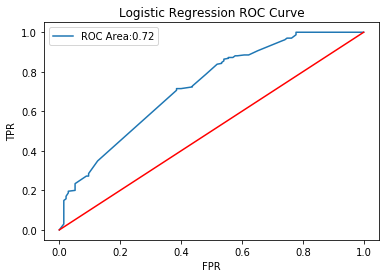

In [1197]:
fpr, tpr, thr = metrics.roc_curve(ytest, model1.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label="ROC Area:%.2f"%auc1)
plt.plot([0,1], [0,1], "r-")
plt.legend()
plt.title("Logistic Regression ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

## 2. Decision Tree

In [1198]:
model2 = tree.DecisionTreeClassifier()
model2.fit(Xtrain,ytrain)
auc2 = metrics.roc_auc_score(ytest,model2.predict_proba(Xtest)[:,1])
print("TEST\nRecall : %.2f"%metrics.recall_score(ytest,model2.predict(Xtest)))
print("Precision : %.2f"%metrics.precision_score(ytest,model2.predict(Xtest)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytest,model2.predict(Xtest)))
print("AUC : %.2f"%auc2)
print("\nTRAIN\nRecall : %.2f"%metrics.recall_score(ytrain,model2.predict(Xtrain)))
print("Precision : %.2f"%metrics.precision_score(ytrain,model2.predict(Xtrain)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytrain,model2.predict(Xtrain)))
print("AUC : %.2f"%metrics.roc_auc_score(ytrain,model2.predict_proba(Xtrain)[:,1]))

TEST
Recall : 0.86
Precision : 0.72
Accuracy : 0.71
AUC : 0.71

TRAIN
Recall : 0.91
Precision : 0.75
Accuracy : 0.74
AUC : 0.77


Text(0, 0.5, 'TPR')

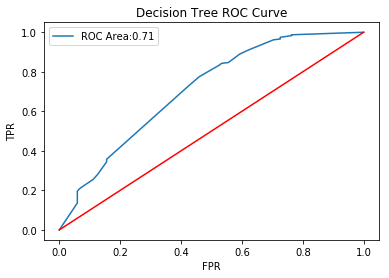

In [1199]:
fpr, tpr, thr = metrics.roc_curve(ytest, model2.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label="ROC Area:%0.2f"%auc2)
plt.plot([0,1], [0,1], "r-")
plt.legend()
plt.title("Decision Tree ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [1200]:
# HYPER PARAMETER TUNING
g=[i for i in range(2,20)]
h=[j for j in range(20,40)]
grid={"max_depth": g,"min_samples_split": h}

gridobj=model_selection.GridSearchCV(estimator=model2, param_grid=grid, scoring='precision')
gridobj.fit(Xtrain,ytrain)
model=gridobj.best_estimator_
model.fit(Xtrain,ytrain)

gridobj.best_params_

c:\users\bhawana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 2, 'min_samples_split': 20}

In [1201]:
auc2 = metrics.roc_auc_score(ytest,model.predict_proba(Xtest)[:,1])
print("TEST\nRecall : %.2f"%metrics.recall_score(ytest,model.predict(Xtest)))
print("Precision : %.2f"%metrics.precision_score(ytest,model.predict(Xtest)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytest,model.predict(Xtest)))
print("f1-score : %.2f"%metrics.f1_score(ytest,model.predict(Xtest)))
print("AUC score : %.2f"%auc2)
print("TRAIN\nRecall : %.2f"%metrics.recall_score(ytrain,model.predict(Xtrain)))
print("Precision : %.2f"%metrics.precision_score(ytrain,model.predict(Xtrain)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytrain,model.predict(Xtrain)))
print("f1-score : %.2f"%metrics.f1_score(ytrain,model.predict(Xtrain)))
print("AUC score : %.2f"%metrics.roc_auc_score(ytrain,model.predict_proba(Xtrain)[:,1]))

TEST
Recall : 0.83
Precision : 0.73
Accuracy : 0.70
f1-score : 0.78
AUC score : 0.67
TRAIN
Recall : 0.84
Precision : 0.74
Accuracy : 0.71
f1-score : 0.79
AUC score : 0.68


Text(0, 0.5, 'TPR')

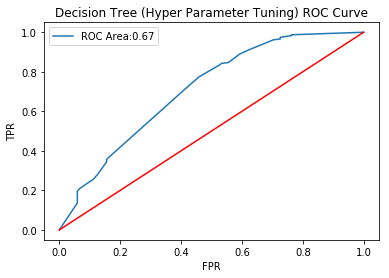

In [1202]:
fpr, tpr, thr = metrics.roc_curve(ytest, model2.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label="ROC Area:%.2f"%auc2)
plt.plot([0,1], [0,1], "r-")
plt.legend()
plt.title("Decision Tree (Hyper Parameter Tuning) ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

## 3. Naive Baye's 

In [1207]:
model3 = naive_bayes.GaussianNB()
model3.fit(Xtrain,ytrain)
auc3 = metrics.roc_auc_score(ytest,model3.predict_proba(Xtest)[:,1])
print("TEST\nRecall : %.2f"%metrics.recall_score(ytest,model3.predict(Xtest)))
print("Precision : %.2f"%metrics.precision_score(ytest,model3.predict(Xtest)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytest,model3.predict(Xtest)))
print("AUC : %.2f"%auc3)
print("\nTRAIN\nRecall : %.2f"%metrics.recall_score(ytrain,model3.predict(Xtrain)))
print("Precision : %.2f"%metrics.precision_score(ytrain,model3.predict(Xtrain)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytrain,model3.predict(Xtrain)))
print("AUC : %.2f"%metrics.roc_auc_score(ytrain,model3.predict_proba(Xtrain)[:,1]))

TEST
Recall : 0.85
Precision : 0.72
Accuracy : 0.69
AUC : 0.68

TRAIN
Recall : 0.86
Precision : 0.73
Accuracy : 0.71
AUC : 0.71


Text(0, 0.5, 'TPR')

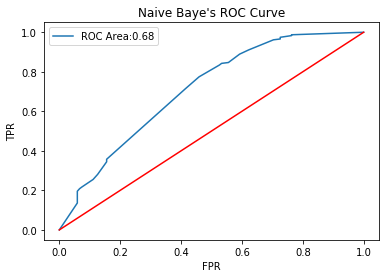

In [1208]:
fpr, tpr, thr = metrics.roc_curve(ytest, model2.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label="ROC Area:%.2f"%auc3)
plt.plot([0,1], [0,1], "r-")
plt.legend()
plt.title("Naive Baye's ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

## 4. Random Forest 

In [1209]:
model4 = ensemble.RandomForestClassifier()
model4.fit(Xtrain,ytrain)
auc4 = metrics.roc_auc_score(ytest,model4.predict_proba(Xtest)[:,1])
print("TEST\nRecall : %.2f"%metrics.recall_score(ytest,model4.predict(Xtest)))
print("Precision : %.2f"%metrics.precision_score(ytest,model4.predict(Xtest)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytest,model4.predict(Xtest)))
print("AUC : %.2f"%auc4)
print("\nTRAIN\nRecall : %.2f"%metrics.recall_score(ytrain,model4.predict(Xtrain)))
print("Precision : %.2f"%metrics.precision_score(ytrain,model4.predict(Xtrain)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytrain,model4.predict(Xtrain)))
print("AUC : %.2f"%metrics.roc_auc_score(ytrain,model4.predict_proba(Xtrain)[:,1]))

TEST
Recall : 0.89
Precision : 0.73
Accuracy : 0.72
AUC : 0.71

TRAIN
Recall : 0.92
Precision : 0.74
Accuracy : 0.74
AUC : 0.77


c:\users\bhawana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'TPR')

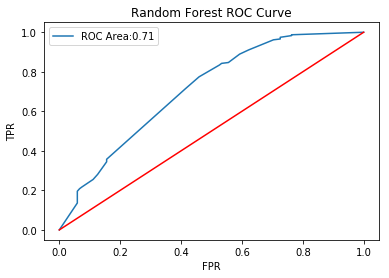

In [1210]:
fpr, tpr, thr = metrics.roc_curve(ytest, model2.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label="ROC Area:%.2f"%auc4)
plt.plot([0,1], [0,1], "r-")
plt.legend()
plt.title("Random Forest ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

## 5. K-Nearest Neighbors (KNN)

In [1211]:
g=[i for i in range(11,37,2)]
grid={"n_neighbors": g}
model=neighbors.KNeighborsClassifier()
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring='precision')
gridobj.fit(Xtrain,ytrain)
best=gridobj.best_estimator_
gridobj.best_params_

model5 = neighbors.KNeighborsClassifier(n_neighbors=15)
model5.fit(Xtrain,ytrain)
auc5 = metrics.roc_auc_score(ytest,model5.predict_proba(Xtest)[:,1])
print("TEST\nRecall : %.2f"%metrics.recall_score(ytest,model5.predict(Xtest)))
print("Precision : %.2f"%metrics.precision_score(ytest,model5.predict(Xtest)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytest,model5.predict(Xtest)))
print("AUC : %.2f"%auc5)
print("\nTRAIN\nRecall : %.2f"%metrics.recall_score(ytrain,model5.predict(Xtrain)))
print("Precision : %.2f"%metrics.precision_score(ytrain,model5.predict(Xtrain)))
print("Accuracy : %.2f"%metrics.accuracy_score(ytrain,model5.predict(Xtrain)))
print("AUC : %.2f"%metrics.roc_auc_score(ytrain,model5.predict_proba(Xtrain)[:,1]))

c:\users\bhawana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


TEST
Recall : 0.86
Precision : 0.73
Accuracy : 0.71
AUC : 0.69

TRAIN
Recall : 0.87
Precision : 0.73
Accuracy : 0.72
AUC : 0.72


Text(0, 0.5, 'TPR')

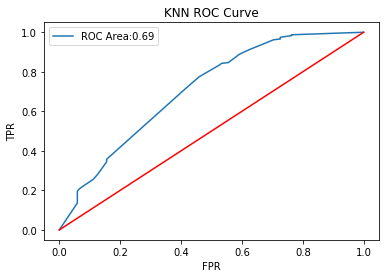

In [1212]:
fpr, tpr, thr = metrics.roc_curve(ytest, model2.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label="ROC Area:%.2f"%auc5)
plt.plot([0,1], [0,1], "r-")
plt.legend()
plt.title("KNN ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

# Model Comparison

In [1251]:
dic = {}
models = [linear_model.LogisticRegression(),tree.DecisionTreeClassifier(),naive_bayes.GaussianNB(),ensemble.RandomForestClassifier(), neighbors.KNeighborsClassifier(n_neighbors=15)]
models_ = [model1, model2, model3, model4, model5]
aucs = [auc1, auc2, auc3, auc4, auc5]
for i in range(5):
    dic[models[i].__class__.__name__] = [metrics.recall_score(ytest,models_[i].predict(Xtest)), metrics.precision_score(ytest,models_[i].predict(Xtest)), metrics.accuracy_score(ytest,models_[i].predict(Xtest)), aucs[i]]
model_comparison = pd.DataFrame(dic)
model_comparison.index=["Recall", "Precision", "Accuracy", "AUC"]
model_comparison

,LogisticRegression,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,KNeighborsClassifier
Recall,0.885106,0.863830,0.851064,0.889362,0.859574
Precision,0.714777,0.725000,0.719424,0.728223,0.729242
Accuracy,0.702703,0.705405,0.694595,0.718919,0.708108
AUC,0.723751,0.671883,0.683530,0.712072,0.688526
